---Image Classification of Fashion Apparel using Convolutional Neural Networks---

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [87]:
(X_train,y_train),(X_test,y_test)=keras.datasets.fashion_mnist.load_data()
# X_test[9999]

In [67]:
X_train=X_train/255.0 #normalizing
X_test=X_test/255.0

In [69]:
X_train = X_train.reshape(-1, 28, 28, 1) #reshape for cnn
X_test = X_test.reshape(-1, 28, 28, 1)

In [79]:
model_1=keras.models.Sequential([ #built cnn layers

    layers.Conv2D(32,3,activation='relu',input_shape = (28,28,1)), #first layer
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,3,activation='relu'), #sec0nd layer
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128,3,activation='relu'), #third layer
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation = 'softmax')
])

In [73]:
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [23]:
history_1 = model_1.fit(
    X_train,
    y_train,
    epochs = 15,
    validation_split = 0.2,
    batch_size = 64,
    verbose=2 
)

Epoch 1/15
750/750 - 19s - 25ms/step - accuracy: 0.7626 - loss: 0.6509 - val_accuracy: 0.8258 - val_loss: 0.4778
Epoch 2/15
750/750 - 14s - 19ms/step - accuracy: 0.8432 - loss: 0.4290 - val_accuracy: 0.8423 - val_loss: 0.4274
Epoch 3/15
750/750 - 15s - 20ms/step - accuracy: 0.8626 - loss: 0.3708 - val_accuracy: 0.8587 - val_loss: 0.3838
Epoch 4/15
750/750 - 15s - 21ms/step - accuracy: 0.8771 - loss: 0.3314 - val_accuracy: 0.8686 - val_loss: 0.3551
Epoch 5/15
750/750 - 15s - 20ms/step - accuracy: 0.8879 - loss: 0.3023 - val_accuracy: 0.8673 - val_loss: 0.3581
Epoch 6/15
750/750 - 15s - 20ms/step - accuracy: 0.8969 - loss: 0.2770 - val_accuracy: 0.8792 - val_loss: 0.3240
Epoch 7/15
750/750 - 16s - 21ms/step - accuracy: 0.9044 - loss: 0.2552 - val_accuracy: 0.8921 - val_loss: 0.2950
Epoch 8/15
750/750 - 16s - 21ms/step - accuracy: 0.9116 - loss: 0.2380 - val_accuracy: 0.8907 - val_loss: 0.2971
Epoch 9/15
750/750 - 16s - 21ms/step - accuracy: 0.9184 - loss: 0.2183 - val_accuracy: 0.8923 - 

In [25]:
test_loss, test_acc = model_1.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"\nTest Loss: {test_loss:.4f}")

313/313 - 2s - 8ms/step - accuracy: 0.8966 - loss: 0.3439

Test Accuracy: 0.8966

Test Loss: 0.3439


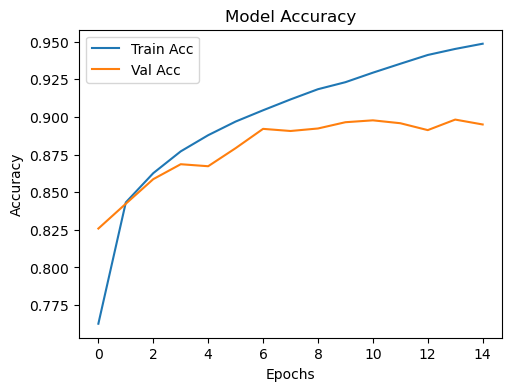

In [27]:
#plot accuracy
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_1.history['accuracy'], label='Train Acc')
plt.plot(history_1.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

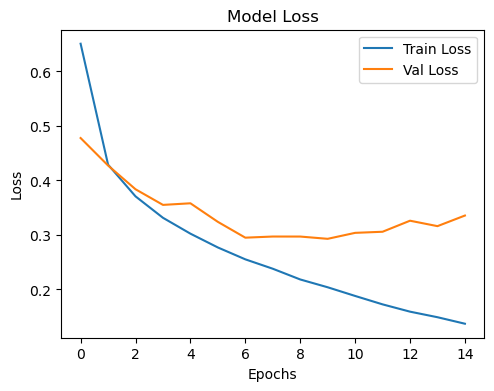

In [29]:
#loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


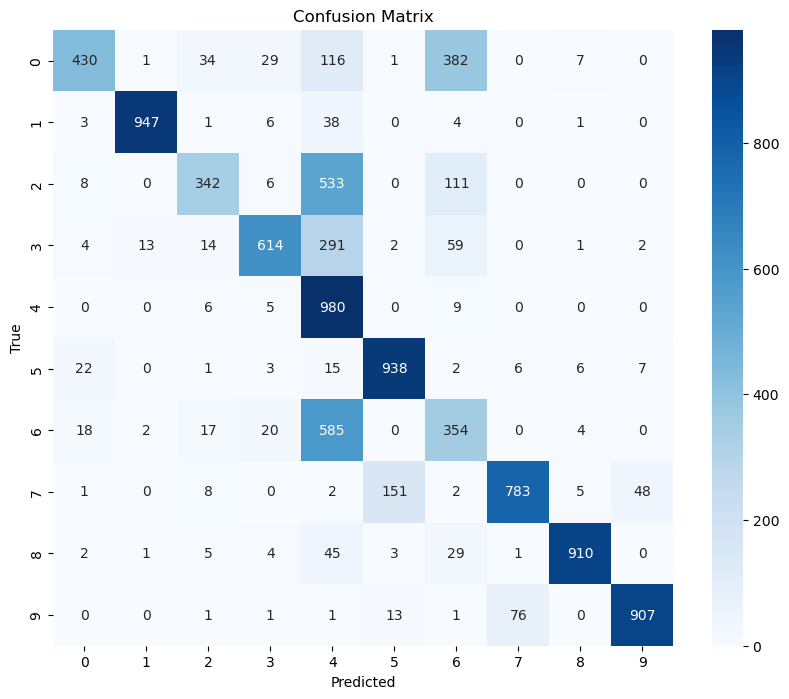

In [51]:
# Predictions
y_pred_probs = model_1.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [47]:
# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.84      0.84      1000
           3       0.91      0.87      0.89      1000
           4       0.78      0.91      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.71      0.70      0.71      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

